---

# 🌟 **Customer Purchasing Behavior Exploration** 🌟

---

## **🎯 Objective**
Conduct a detailed **exploratory data analysis (EDA)** to evaluate customer purchasing behavior across various stores and features. Specifically, we aim to:

1. Examine **sales behavior** before, during, and after holidays.  
2. Identify **seasonal trends** in customer purchasing patterns.  
3. Evaluate the impact of **promotions** on sales and customer behavior.  
4. Understand **correlation** between sales, customers, and other key features.  
5. Analyze **store-specific factors** such as opening times, assortment type, and competition distance.  

---

## **📊 Key Questions**

1. **Distribution of Features**: Are promotions and other features distributed similarly in training and test sets?  
2. **Holidays**: How do sales behave before, during, and after holidays (e.g., Christmas, Easter)?  
3. **Seasonal Patterns**: What are the trends in sales across different months and seasons?  
4. **Correlation**: How strongly are sales correlated with the number of customers?  
5. **Promotions**:  
   - Do promotions attract new customers?  
   - How do they affect existing customers?  
   - Can they be deployed more effectively in specific stores?  
6. **Store Dynamics**:  
   - What is the effect of store opening/closing times on sales?  
   - Which stores are open all weekdays, and how does that affect weekend sales?  
7. **Assortment Types**: How does the type of assortment affect sales?  
8. **Competition**:  
   - How does competitor distance influence sales?  
   - What happens when new competitors enter the market?  
9. **Data Issues**: How do we handle missing values or changes in competitor distance over time?

---

## **🛠️ Approach**

### **1️⃣ Data Cleaning**

To ensure accurate analysis, the data cleaning process involves:  
- **Handling Missing Values**: Fill or impute missing data to avoid skewed results.  
- **Outlier Detection**: Identify and handle extreme values for features like sales and customers.  
- **Date Formatting**: Convert date columns to a standard datetime format for temporal analysis.

---

### **2️⃣ Exploratory Data Analysis**

#### **Feature Distribution**  
- Analyze the distribution of key features (e.g., promotions, holidays, etc.) across training and test sets.

#### **Temporal Trends**  
- Evaluate sales trends before, during, and after holidays.  
- Identify seasonal patterns (monthly and yearly).

#### **Correlation Analysis**  
- Compute correlation between sales, customers, promotions, and other features.

#### **Promotion Effectiveness**  
- Analyze sales performance with and without promotions.  
- Compare the number of new vs. existing customers during promotions.

#### **Store Analysis**  
- Assess the impact of store opening/closing times.  
- Examine assortment types and their influence on sales.  
- Evaluate competitor distance and its effect on sales.

---

### **3️⃣ Statistical Testing**

#### **Tests Conducted**  
1. **Categorical Data**:  
   - **Chi-squared Test**: To analyze relationships between categorical variables (e.g., promo and sales trends).  
2. **Numerical Data**:  
   - **t-test**: To compare numerical differences (e.g., average sales during holidays vs. non-holidays).  
   - **Correlation Coefficient**: To assess relationships between numerical features (e.g., sales and customers).

---

#### **🎯 Decision Rules**
- **Significance Level (α)**: **0.05**  
- **Interpretation**:  
  - If **p-value < 0.05**: Statistically significant relationship.  
  - If **p-value ≥ 0.05**: No significant relationship.  

---

## **✅ Summary of Steps**
1. Clean data by handling missing values, formatting dates, and removing outliers.  
2. Conduct exploratory analysis to answer key questions using visualizations (e.g., bar plots, line charts, heatmaps).  
3. Perform statistical tests to validate observations.  
4. Summarize findings and actionable insights.

<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨ Set Up Logging ✨</h1>



In [1]:
import logging

# Configure logging
logging.basicConfig(
    filename="eda_log.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)

logger = logging.getLogger()

# Example log
logger.info("Logging setup complete.")


<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨ Import Modules ✨</h1>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))
from scripts.Data_loader import load_data
from scripts.Data_Visualization import plot_promo_distribution
from scripts.Analysis import classify_holiday_periods,sales_holiday_summary, visualize_holiday_sales_behavior_all, visualize_seasonal_sales_trends, add_seasonal_labels, analyze_sales_customer_correlation, analyze_promo_effect


logger.info("Imported required libraries.")

<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨ Load and Preview Data ✨</h1>



In [3]:
# Load the dataset
train_data = load_data(r'C:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\Data\train.csv')
test_data = pd.read_csv(r'C:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\Data\test.csv')

logger.info("Loaded training and test datasets.")

# Preview the datasets
print(train_data.head())
print(test_data.head())
logger.info("Previewed datasets.")


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2

c:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\scripts\Data_loader.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


<h2 style="color:  #eebb00;">Dataset Information</h2>



In [4]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [5]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


### Descriptive Statistics: Calculate summary statistics for numerical features

In [8]:
train_data.describe

<bound method NDFrame.describe of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0     

In [9]:
test_data.describe

<bound method NDFrame.describe of           Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3        

In [10]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

### Data Structure: Review the data types of each column

In [11]:
test_data.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

### Data Quality Assessment: Check for missing values

In [12]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨  Data Cleaning ✨</h1>




### Handle Missing Values



In [4]:
# Check for missing values
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()
logger.info(f"Missing values in training data: {missing_train}")
logger.info(f"Missing values in test data: {missing_test}")

# Handle missing values
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)
logger.info("Filled missing values with 0.")

<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨   Promo Distribution Visualization
✨</h1>




c:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\scripts\Data_Visualization.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Promo', palette=['#3498db', '#e74c3c'])  # Use different colors for the two classes


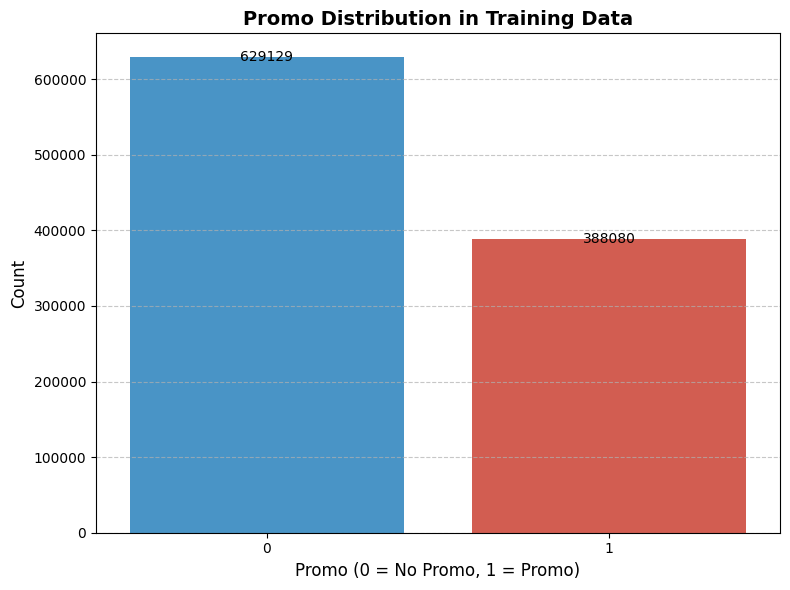

c:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\scripts\Data_Visualization.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Promo', palette=['#3498db', '#e74c3c'])  # Use different colors for the two classes


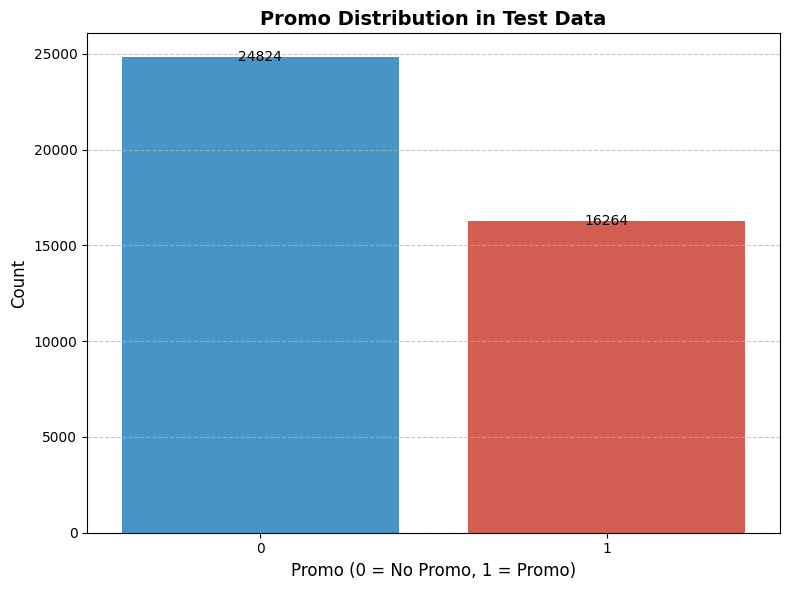

In [14]:
# Plot the promo distribution for training data
plot_promo_distribution(train_data, data_type="Training", logger=logger)

# Plot the promo distribution for test data
plot_promo_distribution(test_data, data_type="Test", logger=logger)

<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨   Sales Behavior Before, During, and After Holidays✨</h1>


c:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\scripts\Analysis.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HolidayPeriod', y='Sales', order=holiday_order, palette="Set2")


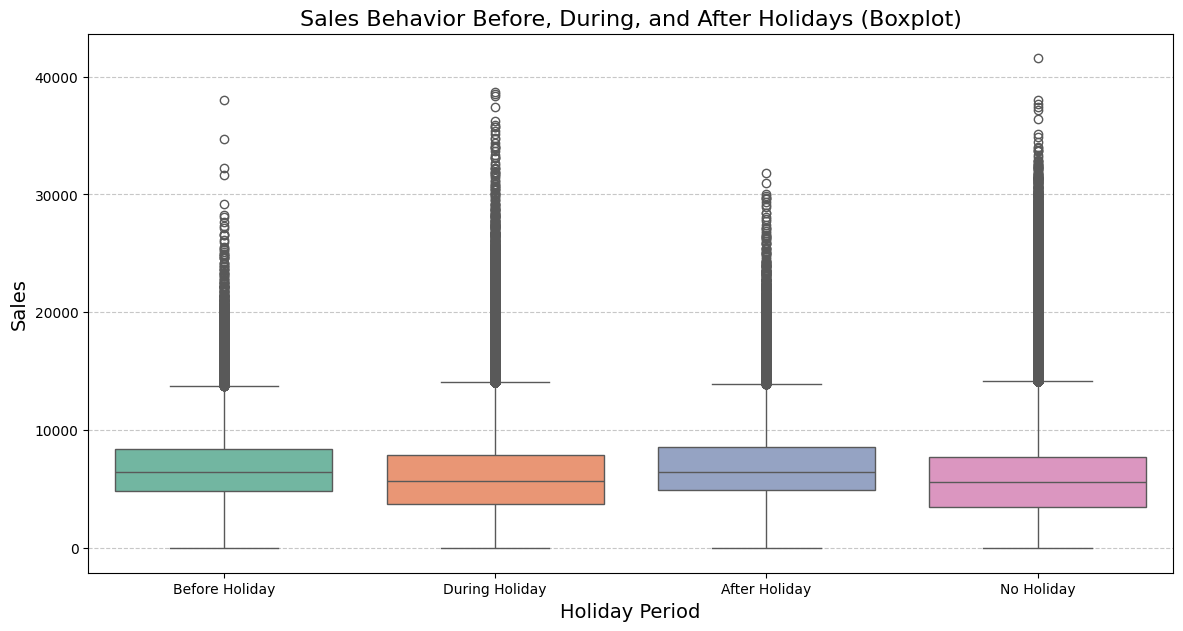

c:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\scripts\Analysis.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='HolidayPeriod', y='Sales', order=holiday_order, palette="coolwarm", split=True)


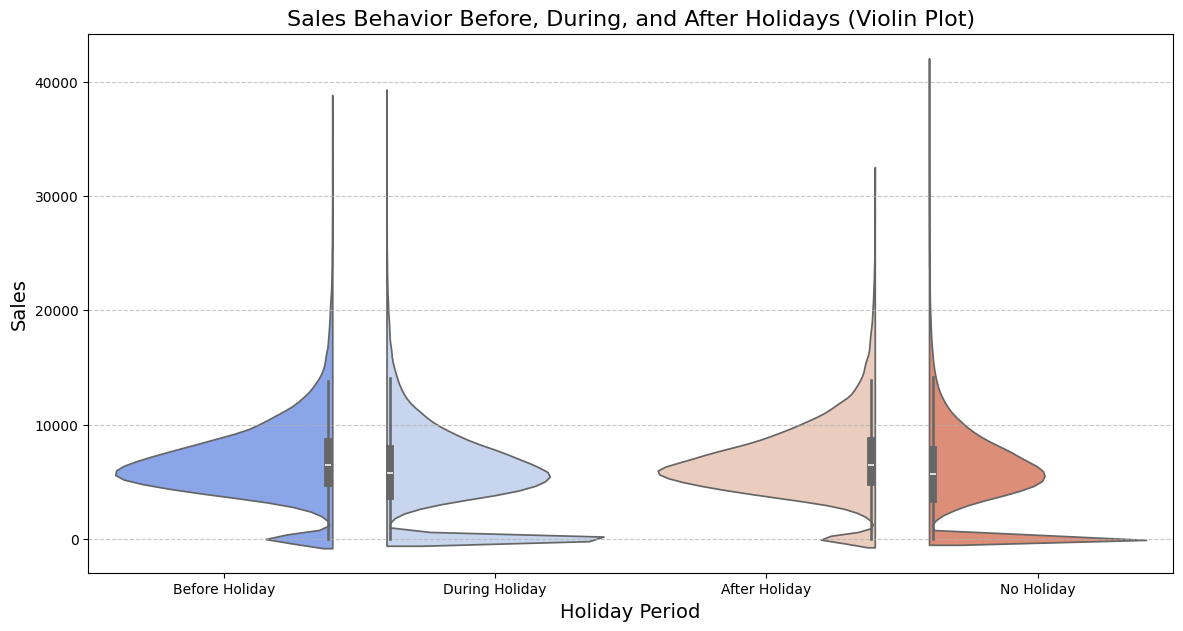

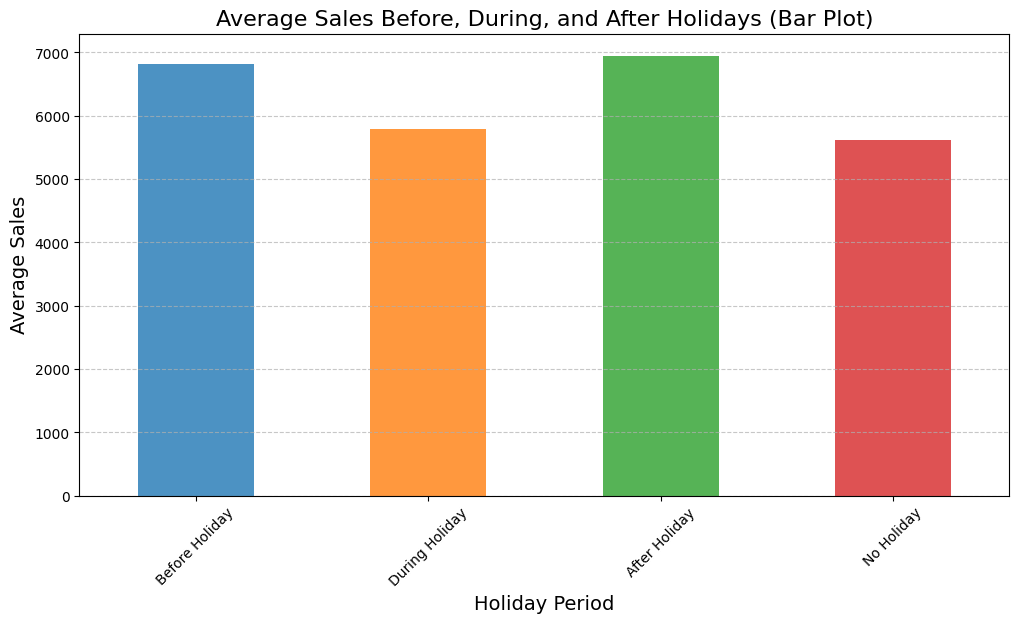

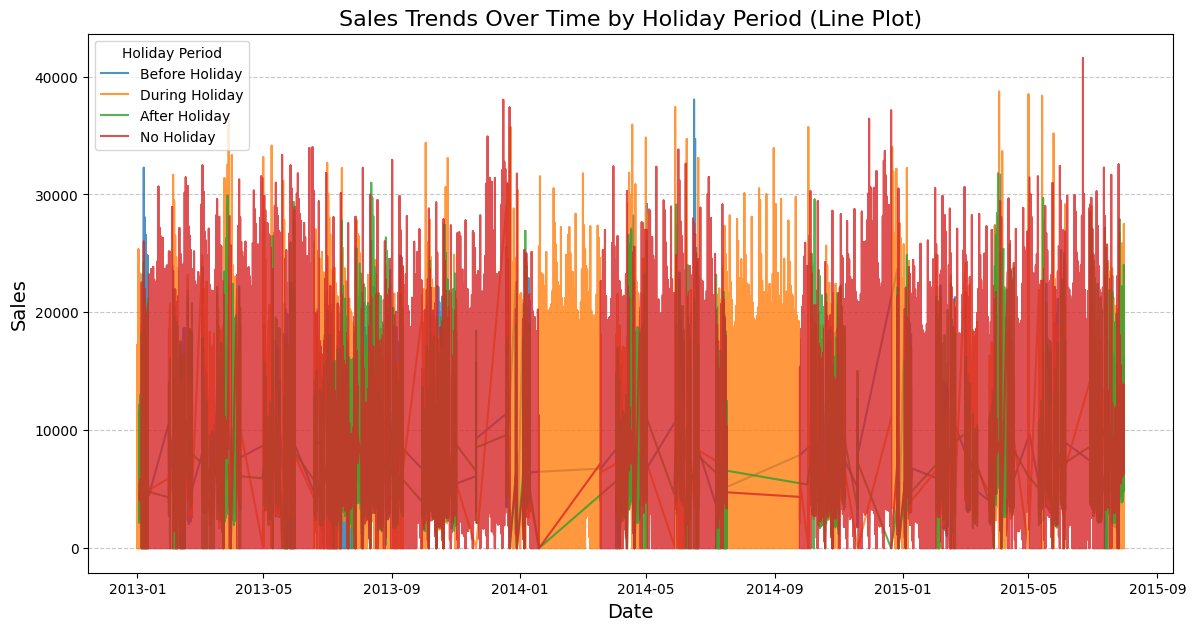

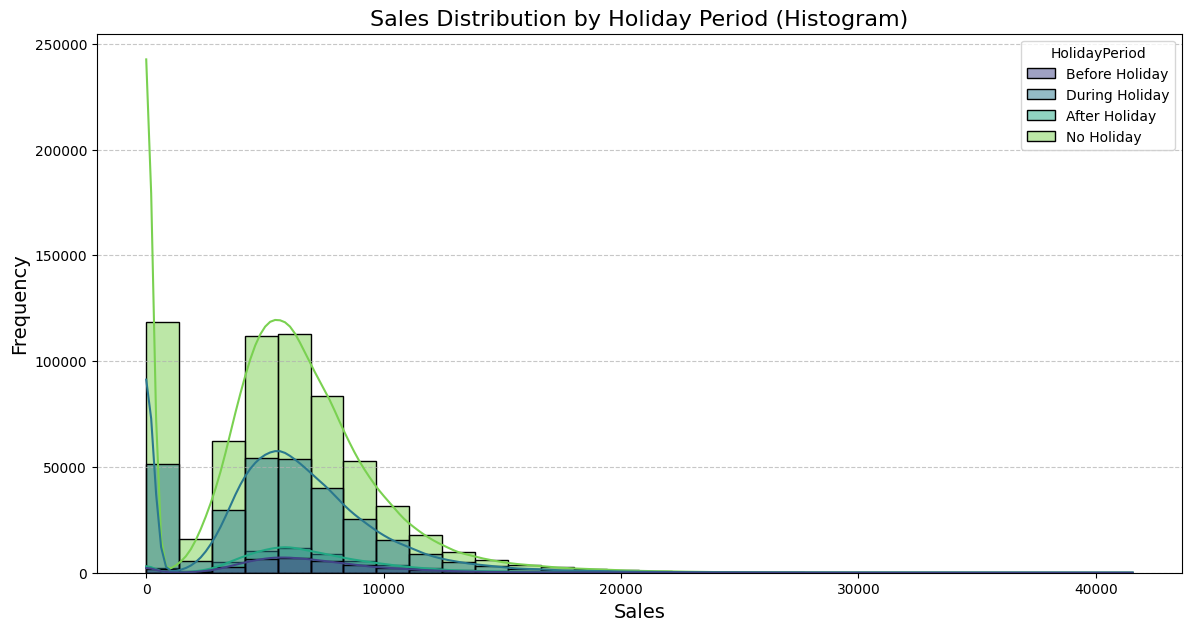

                   count         mean          std  min     25%     50%  \
HolidayPeriod                                                             
After Holiday    52627.0  6949.843863  3323.622964  0.0  4963.0  6498.0   
Before Holiday   32282.0  6819.480887  3333.775750  0.0  4889.0  6452.0   
During Holiday  298244.0  5788.034012  3869.260988  0.0  3756.0  5735.0   
No Holiday      634056.0  5616.283565  3880.535944  0.0  3469.0  5629.0   

                   75%      max  
HolidayPeriod                    
After Holiday   8545.0  31803.0  
Before Holiday  8444.0  38037.0  
During Holiday  7877.0  38722.0  
No Holiday      7753.0  41551.0  


,count,mean,std,min,25%,50%,75%,max
HolidayPeriod,,,,,,,,
After Holiday,52627.0,6949.843863,3323.622964,0.0,4963.0,6498.0,8545.0,31803.0
Before Holiday,32282.0,6819.480887,3333.775750,0.0,4889.0,6452.0,8444.0,38037.0
During Holiday,298244.0,5788.034012,3869.260988,0.0,3756.0,5735.0,7877.0,38722.0
No Holiday,634056.0,5616.283565,3880.535944,0.0,3469.0,5629.0,7753.0,41551.0


In [15]:
# Preprocess the dataset
df = classify_holiday_periods(train_data)

# Visualize holiday sales behavior with all plots
visualize_holiday_sales_behavior_all(df)

# Generate a statistical summary
sales_holiday_summary(df)

<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨Seasonal Purchase Behavior Analysis (Christmas, Easter)✨</h1>


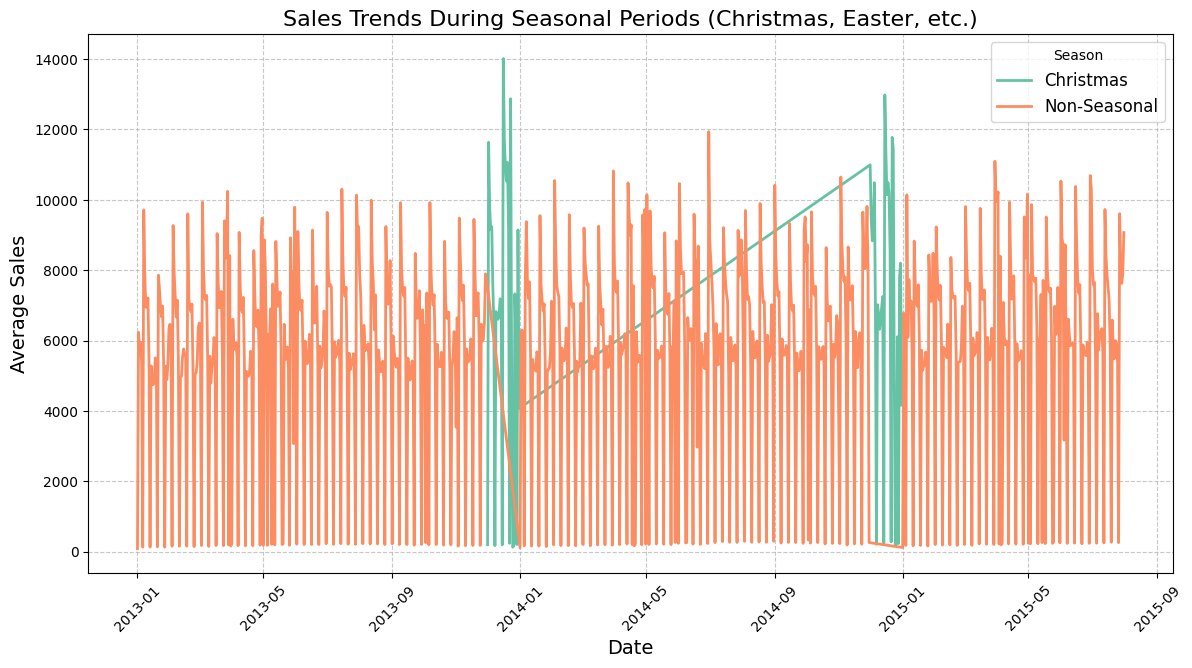

In [16]:
# Step 1: Add seasonal labels (Christmas, Easter, etc.)
df = add_seasonal_labels(train_data)

# Step 2: Visualize sales trends during seasonal periods with a line chart
visualize_seasonal_sales_trends(df)



<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨Sales and Customer Correlation Analysis✨</h1>


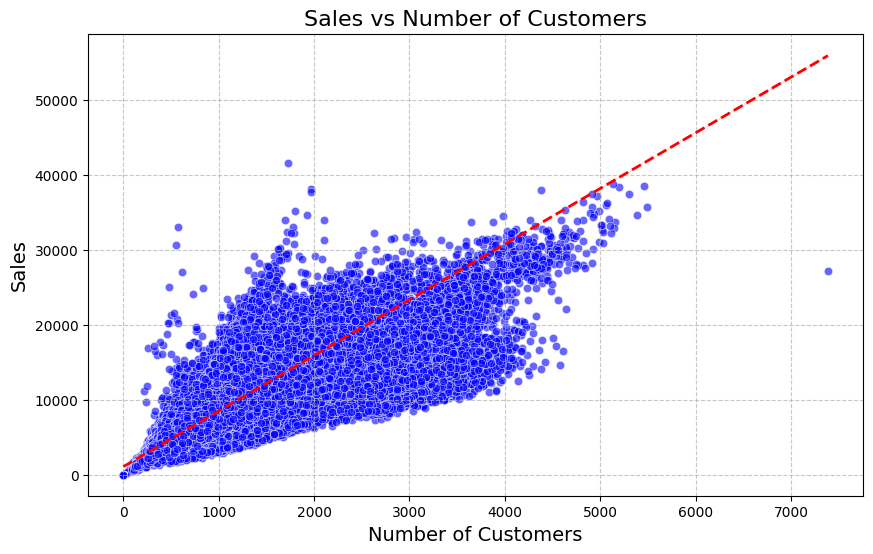

Pearson correlation between Sales and Customers: 0.89


In [17]:
# Call the function to analyze and visualize the correlation
correlation = analyze_sales_customer_correlation(df)

# Print the correlation
print(f"Pearson correlation between Sales and Customers: {correlation:.2f}")

<style>
    h1 {
        color: #ffaa00;
        text-shadow: 2px 2px 5px #000;
        font-family: "Comic Sans MS", sans-serif;
    }
</style>

<h1>✨Impact of Promotions on Sales and Customer Behavior✨</h1>

c:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\scripts\Analysis.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_avg.index, y=sales_avg.values, palette='Set2')


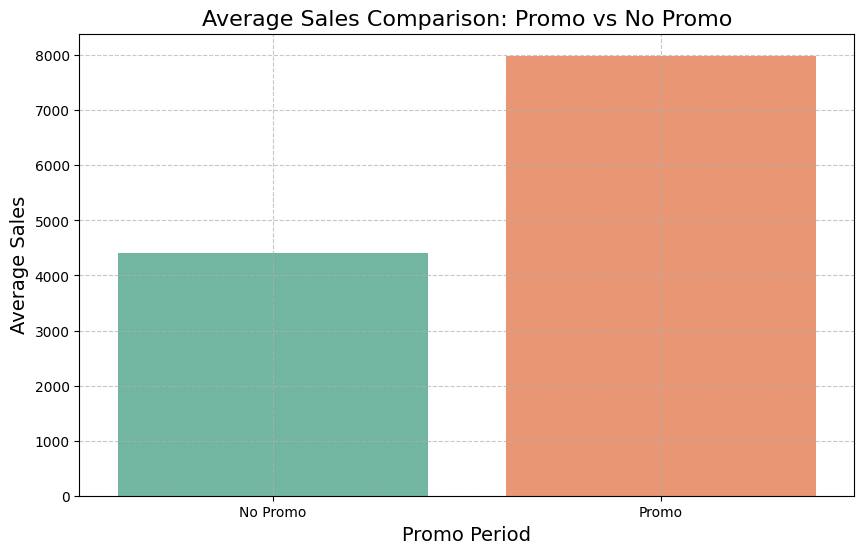

c:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\scripts\Analysis.py:224: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customers_avg.index, y=customers_avg.values, palette='Set2')


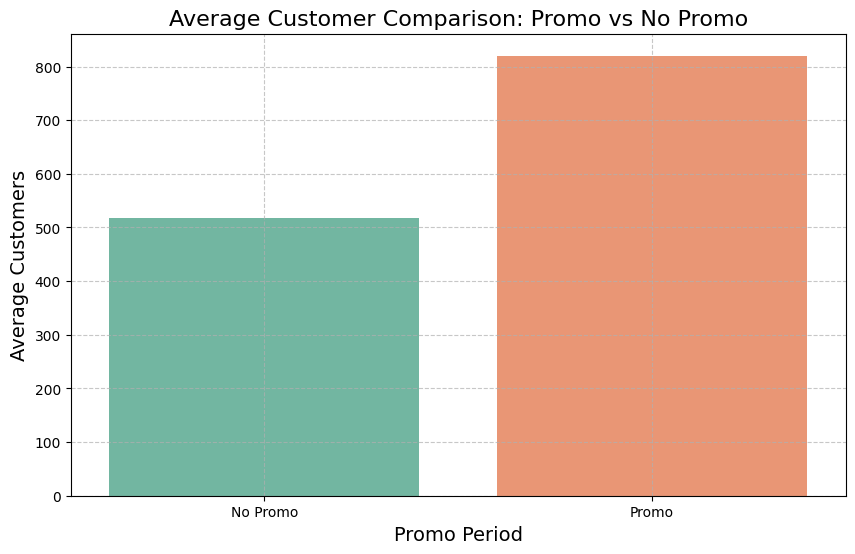

c:\Users\fikad\Desktop\10acedamy\Rossmann-Pharmaceuticals-Sales-Prediction\scripts\Analysis.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_customer_avg.index, y=sales_per_customer_avg.values, palette='Set2')


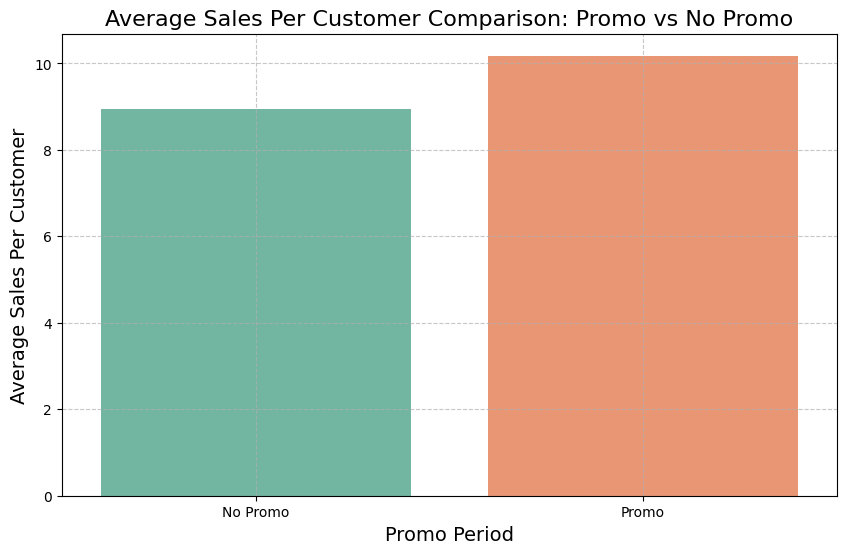

In [5]:
df = pd.DataFrame(train_data)
# Analyze the effect of promos
analyze_promo_effect(df)